In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def filtro_mediana(arreglo):
  numFilas, numColumnas = np.shape(arreglo)
  arregloFiltrado = np.zeros((numFilas, numColumnas))

  # Se duplican primera y última fila
  aux = np.insert(arreglo, [0], arreglo[0,:], axis=0)
  aux = np.insert(aux, [-1], aux[-1,:], axis=0)
  # Se duplican primera y última columna
  # Reshape aplicado es para transformar los arreglos Filtrado[:,k] de "vector fila" a "vector columna"
  aux = np.insert(aux, [0], aux[:,0].reshape(len(aux[:,0]),1), axis=1)
  aux = np.insert(aux, [-1], aux[:,-1].reshape(len(aux[:,-1]),1), axis=1)

  # Aplicación de filtro a cada elemento de la matriz
  for i in range(numFilas):
    for j in range(numColumnas):
      # aux[i:i+3, j:j+3] <- Ventana de 3x3
      arregloFiltrado[i, j] = np.median(aux[i:i+3, j:j+3])

  return arregloFiltrado

In [3]:
numeroImg = ["4", "25", "27"] # Imágenes seleccionadas
imagen = []
# Cargar imágenes en lista
for i in numeroImg:
  ruta = f"/content/noisy_{i}.png" # Utilizar esta linea si las imagenes son cargadas directamente a Google Colab
  # ruta = f"noisy_{i}.png" # Utilizar esta linea si se ejecuta en local y las imagenes están en la misma carpeta que el notebook
  imagen.append(cv2.imread(ruta, cv2.IMREAD_GRAYSCALE))

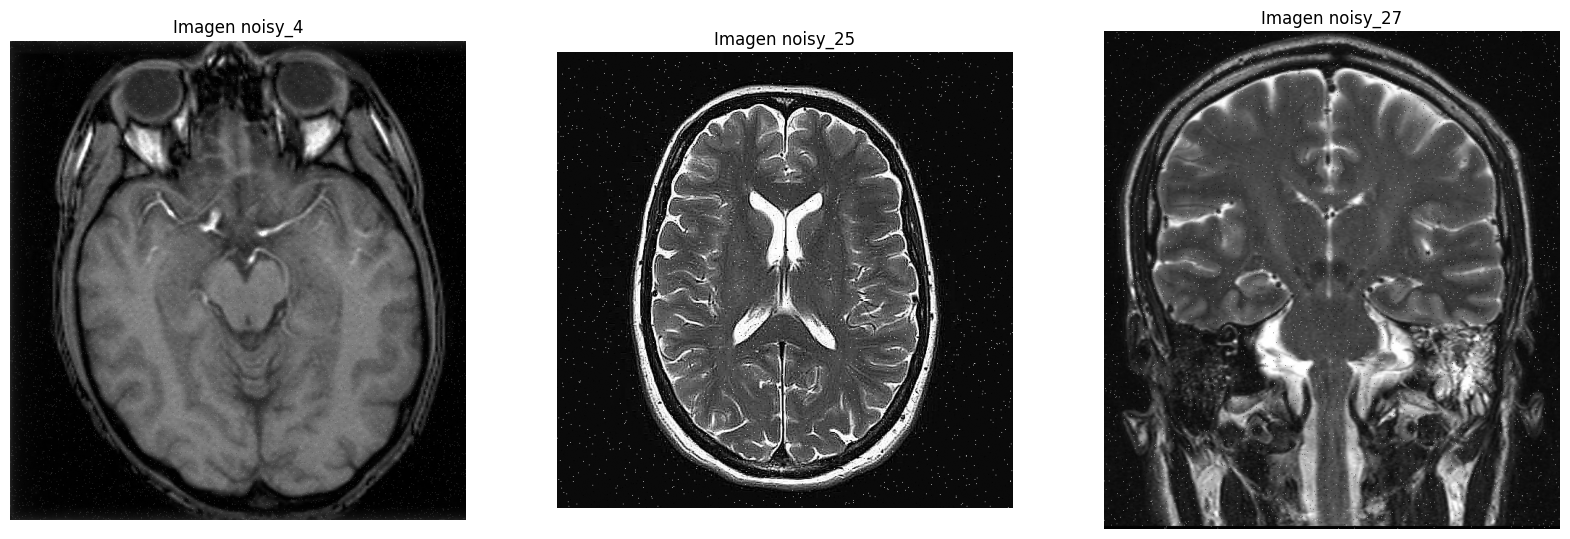

In [4]:
# Imágenes originales
n = len(numeroImg)
fig, axs = plt.subplots(1,n, figsize=(20,60))
for i in range(n):
  axs[i].imshow(imagen[i], cmap="gray")
  axs[i].set_title(f"Imagen noisy_{numeroImg[i]}")
  axs[i].set_axis_off()

#plt.savefig('imagenes_originales.png', dpi=150, bbox_inches='tight', transparent=True)

In [5]:
imagenFiltrada = []
# Aplicación de filtro mediana
for i in range(n):
  imagenFiltrada.append(filtro_mediana(imagen[i]))

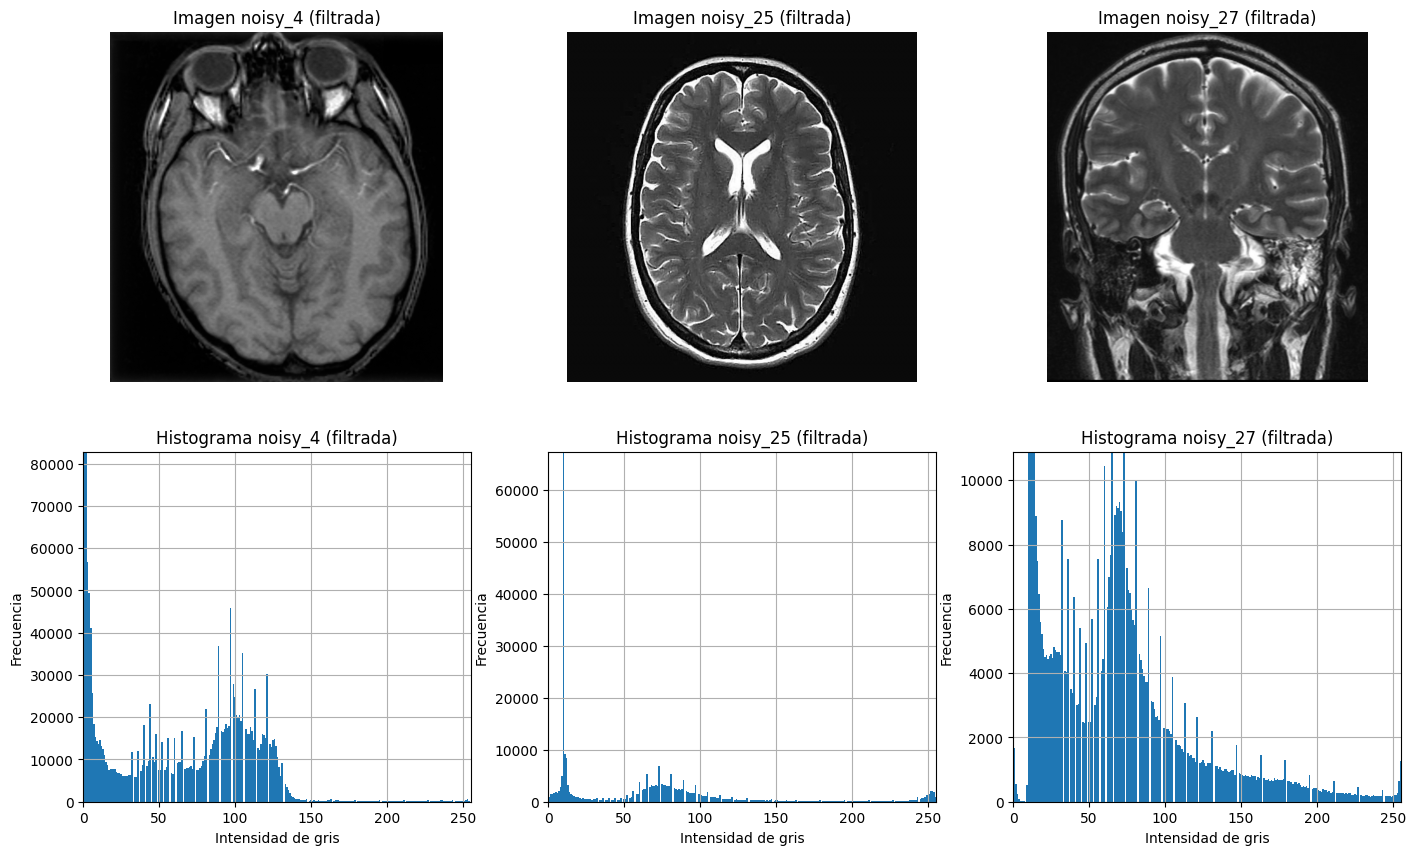

In [17]:
figF, axF = plt.subplots(2, n, figsize=(17, 10))

for i in range(n):
  # Imágenes filtradas
  axF[0,i].imshow(imagenFiltrada[i], cmap="gray")
  axF[0,i].set_title(f"Imagen noisy_{numeroImg[i]} (filtrada)")
  axF[0,i].set_axis_off()

  # Histograma correspondiente a cada imagen filtrada
  hist, bins = np.histogram(imagenFiltrada[i].ravel(), bins=np.arange(0, 257, 1))
  axF[1,i].bar(bins[:-1], hist, width=1.0)
  axF[1,i].set_title(f"Histograma noisy_{numeroImg[i]} (filtrada)")
  axF[1,i].set_xlabel("Intensidad de gris")
  axF[1,i].set_ylabel("Frecuencia")
  axF[1,i].grid()
  axF[1,i].set_xlim(0,255)
  axF[1,i].set_ylim(0,0.4*np.max(hist)) # Se restringe límite superior para mejorar visualización de las zonas de interés del histograma
#plt.savefig('imagenes_filtradas-histograma.png', dpi=150, bbox_inches='tight', transparent=True)

In [31]:
cerebro = []

umbral = [[75, 130], # Umbral inferior y superior 1a imagen
          [50,120], # Umbral inferior y superior 2a imagen
          [50,150]] # Umbral inferior y superior 3a imagen

# Creación de máscara
cerebro_mask0 = np.where((imagenFiltrada[0] >= umbral[0][0]) & (imagenFiltrada[0] <= umbral[0][1]), 1, 0)
# Producto de Hadamard
cerebro_segmentado0 = imagenFiltrada[0]*cerebro_mask0
cerebro.append(cerebro_segmentado0)

# Creación de máscara
cerebro_mask1 = np.where((imagenFiltrada[1] >= umbral[1][0]) & (imagenFiltrada[1] <= umbral[1][1]), 1, 0)
# Producto de Hadamard
cerebro_segmentado1 = imagenFiltrada[1]*cerebro_mask1
cerebro.append(cerebro_segmentado1)

# Creación de máscara
cerebro_mask2 = np.where((imagenFiltrada[2] >= umbral[2][0]) & (imagenFiltrada[2] <= umbral[2][1]), 1, 0)
# Producto de Hadamard
cerebro_segmentado2 = imagenFiltrada[2]*cerebro_mask2
cerebro.append(cerebro_segmentado2)

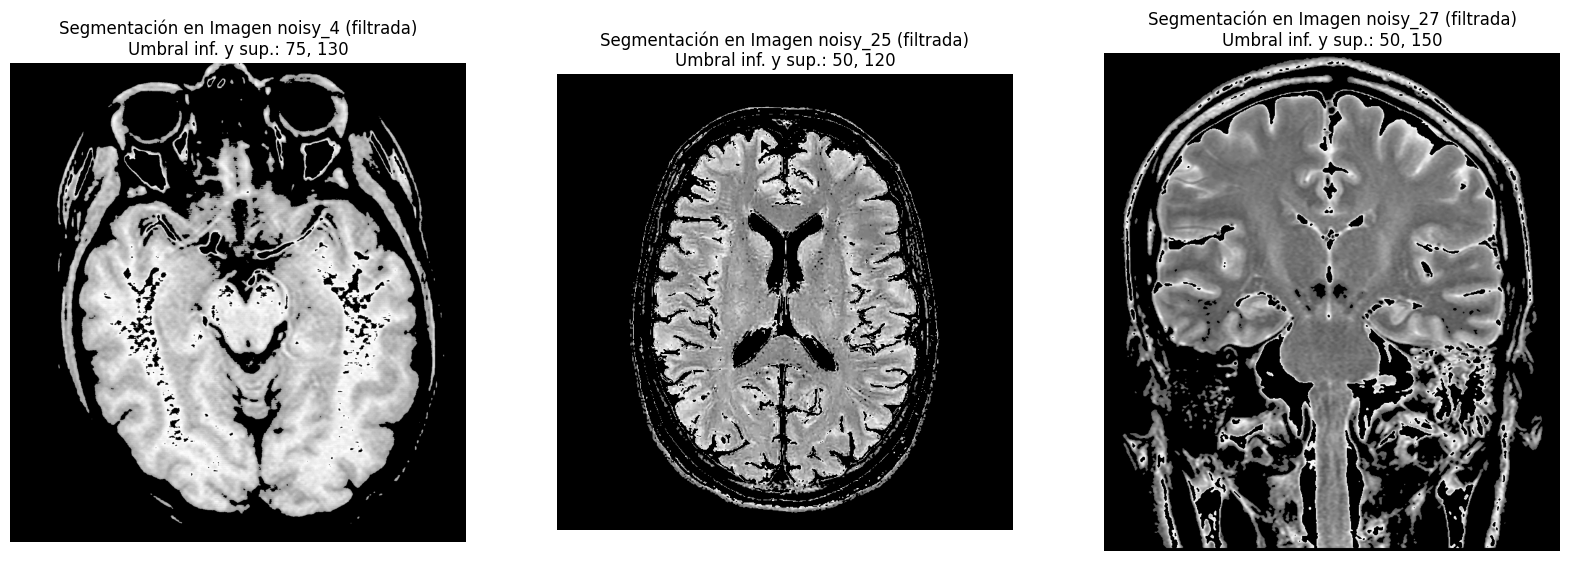

In [32]:
# Cerebro segmentado
figC, axC = plt.subplots(1, n, figsize=(20,60))
for i in range(n):
  axC[i].imshow(cerebro[i], cmap="gray")
  axC[i].set_title(f"Segmentación en Imagen noisy_{numeroImg[i]} (filtrada)\nUmbral inf. y sup.: {umbral[i][0]}, {umbral[i][1]}")
  axC[i].set_axis_off()
#plt.savefig('imagenes_segmentadas.png', dpi=150, bbox_inches='tight', transparent=True)

# Generación de imágenes para informe

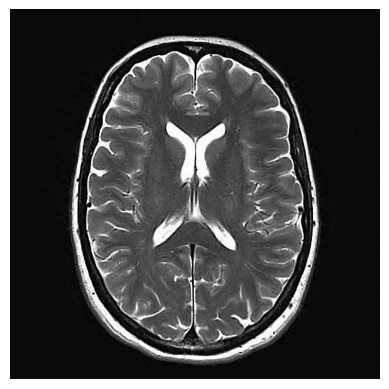

In [33]:
# Imagen noisy_25 filtrada
figT, axT = plt.subplots()

axT.imshow(imagenFiltrada[1], cmap="gray")
axT.set_axis_off()

#plt.savefig('noisy_25-filtrada.png', dpi=300, bbox_inches='tight', transparent=True)

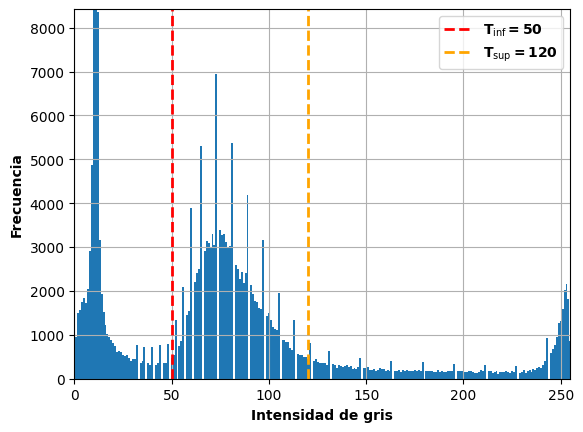

In [42]:
# Histograma correspondiente a imagen noisy_25 (filtrada)

figH, axH = plt.subplots()

hist, bins = np.histogram(imagenFiltrada[1].ravel(), bins=np.arange(0, 257, 1))

axH.bar(bins[:-1], hist, width=1.0)

axH.axvline(x=50, color='red', linestyle='--', linewidth=2, label=r"$\mathbf{T_{\rm inf}=50}$")
axH.axvline(x=120, color='orange', linestyle='--', linewidth=2, label=r"$\mathbf{T_{{\rm sup}}=120}$")

axH.set_xlabel("Intensidad de gris", fontweight='bold')
axH.set_ylabel("Frecuencia", fontweight='bold')
axH.grid()
axH.legend()
axH.set_xlim(0,255)
axH.set_ylim(0,0.05*np.max(hist)) # Se restringe límite superior para mejorar visualización del histograma
plt.savefig('noisy_25-filtrada-histograma.pdf', dpi=150, bbox_inches='tight', transparent=True)

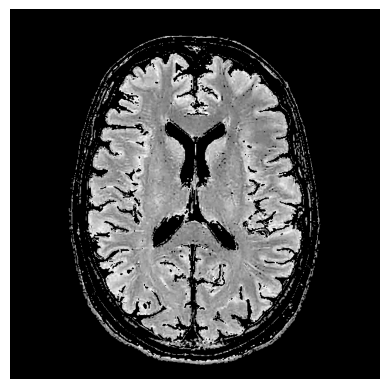

In [35]:
# Cerebro segmentado de imagen noisy_25 (filtrada)
figS, axS = plt.subplots()
axS.imshow(cerebro[1], cmap="gray")
axS.set_axis_off()
#plt.savefig('noisy_25-segmentado.png', dpi=150, bbox_inches='tight', transparent=True)

# A continuación se realizan pruebas con valores de umbral más acotados

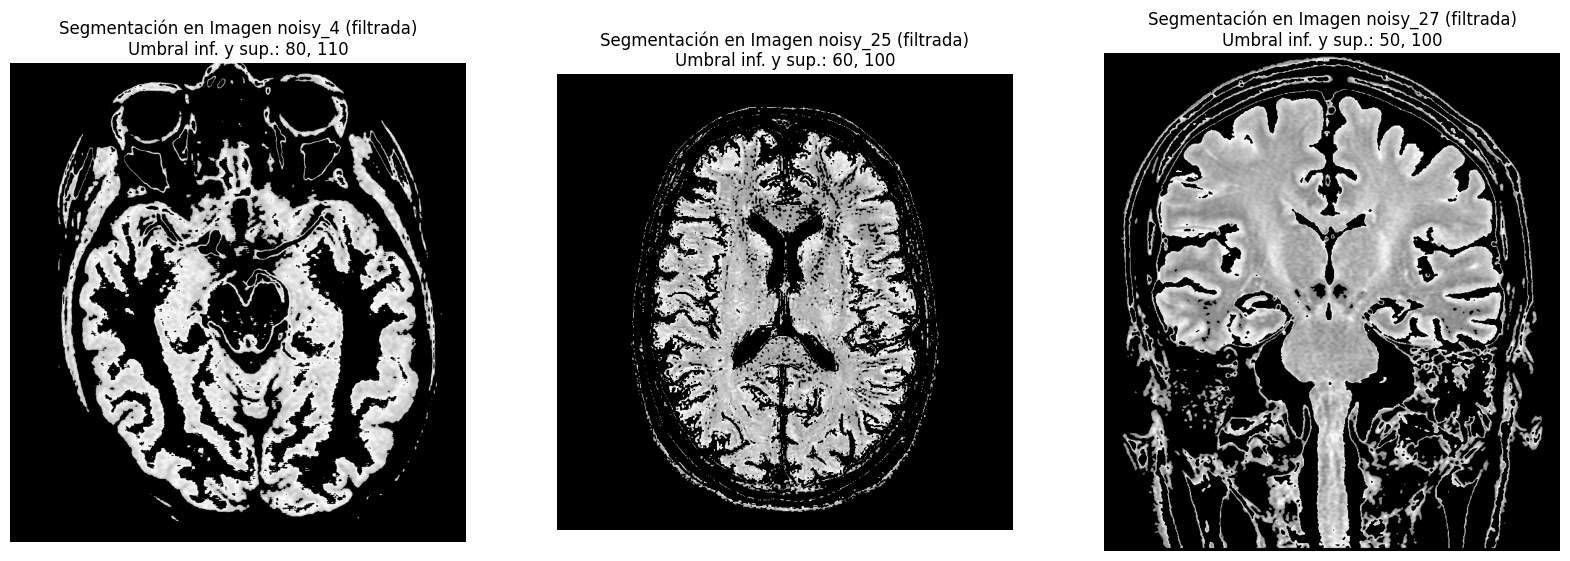

In [21]:
cerebro = []

umbral = [[80, 110], # Umbral inferior y superior 1a imagen
          [60,100], # Umbral inferior y superior 2a imagen
          [50,100]] # Umbral inferior y superior 3a imagen

# Creación de máscara
cerebro_mask0 = np.where((imagenFiltrada[0] >= umbral[0][0]) & (imagenFiltrada[0] <= umbral[0][1]), 1, 0)
# Producto de Hadamard
cerebro_segmentado0 = imagenFiltrada[0]*cerebro_mask0
cerebro.append(cerebro_segmentado0)

# Creación de máscara
cerebro_mask1 = np.where((imagenFiltrada[1] >= umbral[1][0]) & (imagenFiltrada[1] <= umbral[1][1]), 1, 0)
# Producto de Hadamard
cerebro_segmentado1 = imagenFiltrada[1]*cerebro_mask1
cerebro.append(cerebro_segmentado1)

# Creación de máscara
cerebro_mask2 = np.where((imagenFiltrada[2] >= umbral[2][0]) & (imagenFiltrada[2] <= umbral[2][1]), 1, 0)
# Producto de Hadamard
cerebro_segmentado2 = imagenFiltrada[2]*cerebro_mask2
cerebro.append(cerebro_segmentado2)

# Cerebro segmentado
figC, axC = plt.subplots(1, n, figsize=(20,60))
for i in range(n):
  axC[i].imshow(cerebro[i], cmap="gray")
  axC[i].set_title(f"Segmentación en Imagen noisy_{numeroImg[i]} (filtrada)\nUmbral inf. y sup.: {umbral[i][0]}, {umbral[i][1]}")
  axC[i].set_axis_off()
#plt.savefig('imagenes_segmentadas1.png', dpi=150, bbox_inches='tight', transparent=True)

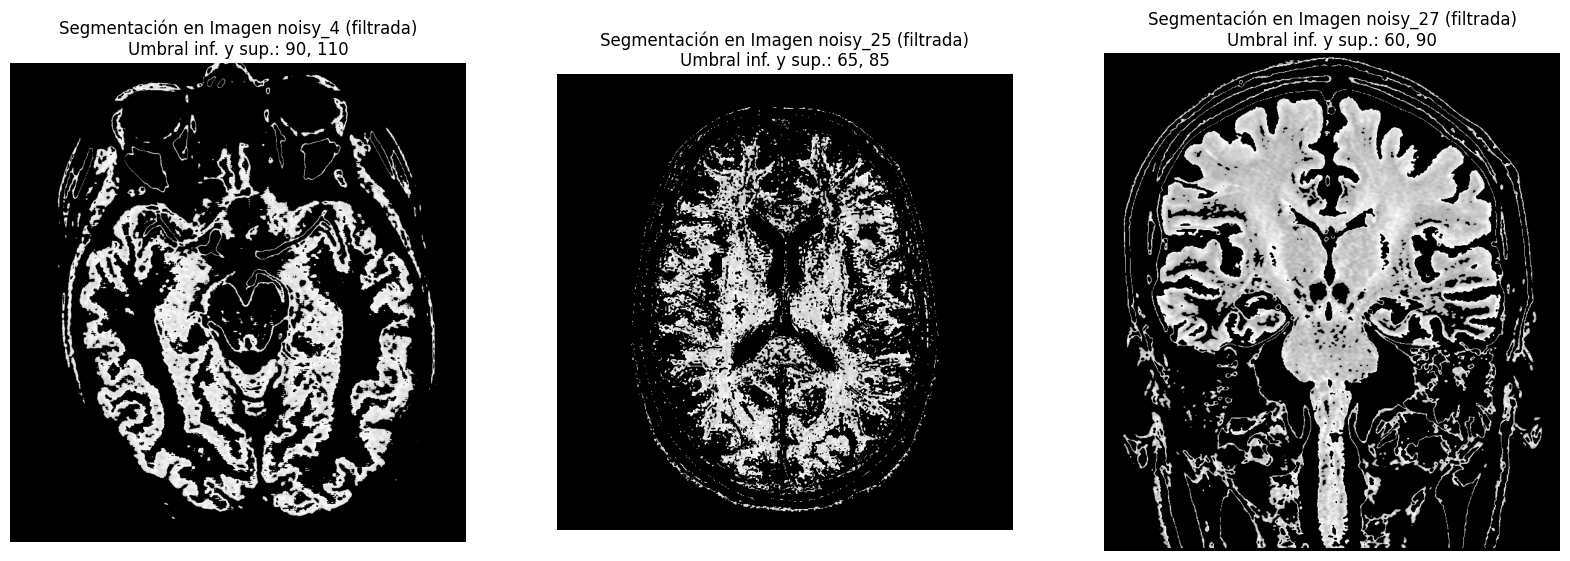

In [24]:
cerebro = []

umbral = [[90, 110], # Umbral inferior y superior 1a imagen
          [65,85], # Umbral inferior y superior 2a imagen
          [60,90]] # Umbral inferior y superior 3a imagen

# Creación de máscara
cerebro_mask0 = np.where((imagenFiltrada[0] >= umbral[0][0]) & (imagenFiltrada[0] <= umbral[0][1]), 1, 0)
# Producto de Hadamard
cerebro_segmentado0 = imagenFiltrada[0]*cerebro_mask0
cerebro.append(cerebro_segmentado0)

# Creación de máscara
cerebro_mask1 = np.where((imagenFiltrada[1] >= umbral[1][0]) & (imagenFiltrada[1] <= umbral[1][1]), 1, 0)
# Producto de Hadamard
cerebro_segmentado1 = imagenFiltrada[1]*cerebro_mask1
cerebro.append(cerebro_segmentado1)

# Creación de máscara
cerebro_mask2 = np.where((imagenFiltrada[2] >= umbral[2][0]) & (imagenFiltrada[2] <= umbral[2][1]), 1, 0)
# Producto de Hadamard
cerebro_segmentado2 = imagenFiltrada[2]*cerebro_mask2
cerebro.append(cerebro_segmentado2)

# Cerebro segmentado
figC, axC = plt.subplots(1, n, figsize=(20,60))
for i in range(n):
  axC[i].imshow(cerebro[i], cmap="gray")
  axC[i].set_title(f"Segmentación en Imagen noisy_{numeroImg[i]} (filtrada)\nUmbral inf. y sup.: {umbral[i][0]}, {umbral[i][1]}")
  axC[i].set_axis_off()
#plt.savefig('imagenes_segmentadas2.png', dpi=150, bbox_inches='tight', transparent=True)

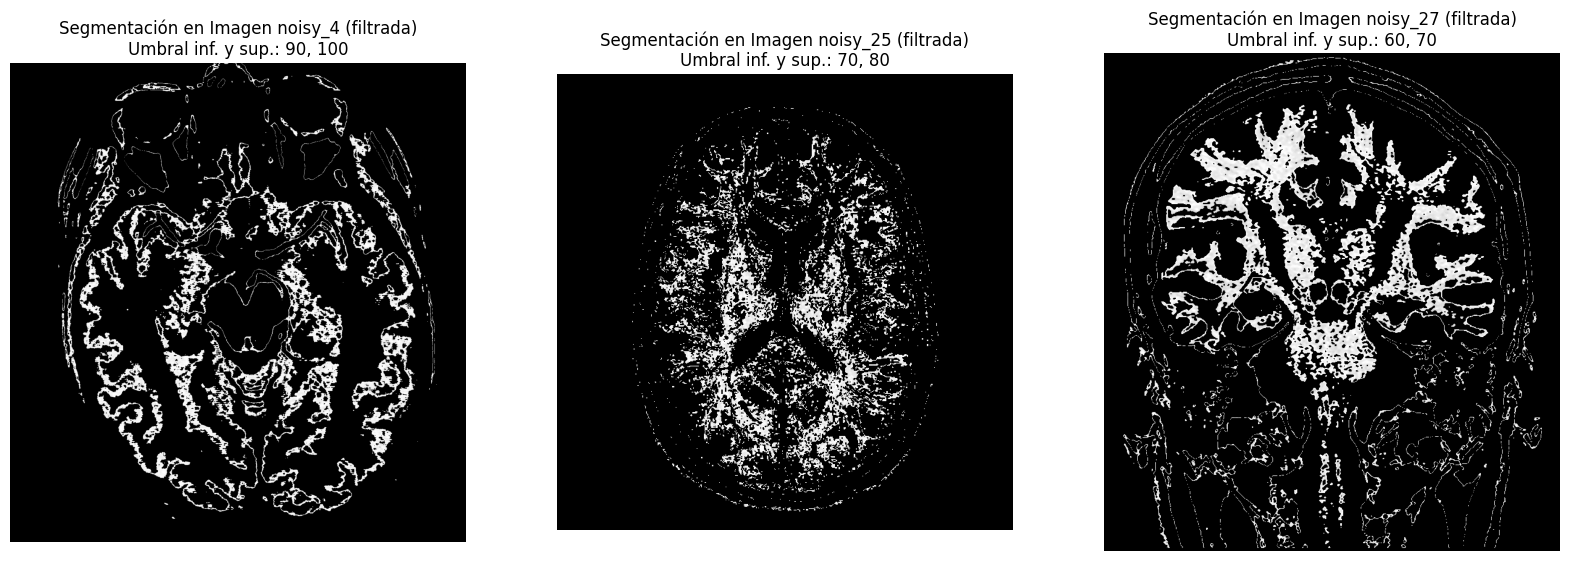

In [26]:
cerebro = []

umbral = [[90, 100], # Umbral inferior y superior 1a imagen
          [70,80], # Umbral inferior y superior 2a imagen
          [60,70]] # Umbral inferior y superior 3a imagen

# Creación de máscara
cerebro_mask0 = np.where((imagenFiltrada[0] >= umbral[0][0]) & (imagenFiltrada[0] <= umbral[0][1]), 1, 0)
# Producto de Hadamard
cerebro_segmentado0 = imagenFiltrada[0]*cerebro_mask0
cerebro.append(cerebro_segmentado0)

# Creación de máscara
cerebro_mask1 = np.where((imagenFiltrada[1] >= umbral[1][0]) & (imagenFiltrada[1] <= umbral[1][1]), 1, 0)
# Producto de Hadamard
cerebro_segmentado1 = imagenFiltrada[1]*cerebro_mask1
cerebro.append(cerebro_segmentado1)

# Creación de máscara
cerebro_mask2 = np.where((imagenFiltrada[2] >= umbral[2][0]) & (imagenFiltrada[2] <= umbral[2][1]), 1, 0)
# Producto de Hadamard
cerebro_segmentado2 = imagenFiltrada[2]*cerebro_mask2
cerebro.append(cerebro_segmentado2)

# Cerebro segmentado
figC, axC = plt.subplots(1, n, figsize=(20,60))
for i in range(n):
  axC[i].imshow(cerebro[i], cmap="gray")
  axC[i].set_title(f"Segmentación en Imagen noisy_{numeroImg[i]} (filtrada)\nUmbral inf. y sup.: {umbral[i][0]}, {umbral[i][1]}")
  axC[i].set_axis_off()
#plt.savefig('imagenes_segmentadas3.png', dpi=150, bbox_inches='tight', transparent=True)